In [1]:
from MDAnalysis import Universe
liganed = Universe('sang/liganded.pdb')
unliganed = Universe('sang/unliganded.pdb')

In [2]:
from MDAnalysis.analysis.rms import rmsd
rmsd(liganed.atoms.CA.positions, unliganed.atoms.CA.positions)

72.78406326488374

@> 4000 atoms and 1 coordinate set(s) were parsed in 0.03s.
DEBUG:.prody:4000 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 4003 atoms and 1 coordinate set(s) were parsed in 0.03s.
DEBUG:.prody:4003 atoms and 1 coordinate set(s) were parsed in 0.03s.


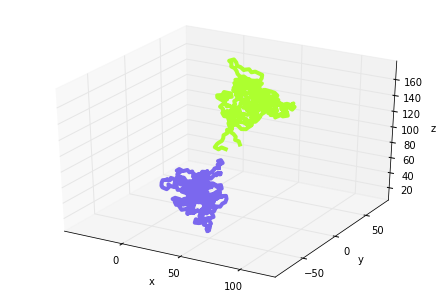

In [3]:
%matplotlib inline

from prody import *
liganed = parsePDB('sang/liganded.pdb')
unliganed = parsePDB('sang/unliganded.pdb')
showProtein(liganed, unliganed)

In [4]:
def printMatch(match):
    print('Chain 1     : {}'.format(match[0]))
    print('Chain 2     : {}'.format(match[1]))
    print('Length      : {}'.format(len(match[0])))
    print('Seq identity: {}'.format(match[2]))
    print('Seq overlap : {}'.format(match[3]))
    print('RMSD        : {}\n'.format(calcRMSD(match[0], match[1])))

In [5]:
matches = matchChains(liganed, unliganed)
for match in matches:
    printMatch(match)


@> Checking AtomGroup liganded: 1 chains are identified
DEBUG:.prody:Checking AtomGroup liganded: 1 chains are identified
@> Checking AtomGroup unliganded: 1 chains are identified
DEBUG:.prody:Checking AtomGroup unliganded: 1 chains are identified
@> Trying to match chains based on residue numbers and names:
DEBUG:.prody:Trying to match chains based on residue numbers and names:
@>   Comparing Chain   from liganded (len=401) and Chain   from unliganded (len=401):
DEBUG:.prody:  Comparing Chain   from liganded (len=401) and Chain   from unliganded (len=401):
@> 	Match: 401 residues match with 100% sequence identity and 100% overlap.
DEBUG:.prody:	Match: 401 residues match with 100% sequence identity and 100% overlap.


Chain 1     : AtomMap Chain   from liganded -> Chain   from unliganded
Chain 2     : AtomMap Chain   from unliganded -> Chain   from liganded
Length      : 401
Seq identity: 100.0
Seq overlap : 100
RMSD        : 117.056085263



### using pymol for alignment
```
TITLE     Protein
 ObjectMolecule: Read crystal symmetry information.
 Symmetry: Found 1 symmetry operators.
 CmdLoad: "E:/works/gp120/pymol/liganded.pdb" loaded as "liganded".
TITLE     Protein
 ObjectMolecule: Read crystal symmetry information.
 Symmetry: Found 1 symmetry operators.
 CmdLoad: "E:/works/gp120/pymol/unliganded.pdb" loaded as "unliganded".

PyMOL>align liganded, unliganded
 Match: read scoring matrix.
 Match: assigning 401 x 401 pairwise scores.
 MatchAlign: aligning residues (401 vs 401)...
 ExecutiveAlign: 3997 atoms aligned.
 ExecutiveRMS: 218 atoms rejected during cycle 1 (RMS=14.49).
 ExecutiveRMS: 141 atoms rejected during cycle 2 (RMS=11.74).
 ExecutiveRMS: 106 atoms rejected during cycle 3 (RMS=10.58).
 ExecutiveRMS: 57 atoms rejected during cycle 4 (RMS=9.99).
 ExecutiveRMS: 34 atoms rejected during cycle 5 (RMS=9.72).
 Executive: RMS =    9.562 (3441 to 3441 atoms)
```

![alignment](./pics/align.jpg)


** mature closed state **

*Here we report the structure at 3.5-Å resolution for an HIV-1-Env trimer captured in a mature closed state by antibodies PGT122 and 35O22.*

** alignment between mature closed and CD4-bound state **

![nature alignment](./pics/nature_align.jpg)

*Overall structure and sequence comparison. gp120 is shown in ribbon representation in prefusion mature closed (red) and CD4-bound (yellow, PDB ID: 3JWD [22]) conformation. V1V2 (PDB ID: 3U2S [51]) has been modeled onto the CD4-bound conformation. Secondary structure is defined for prefusion and CD4-bound conformation on the BG505 sequence, with cylinders representing α-helix and arrows β-strands. Disordered residues are indicated by “X”. Residues that move more than 3 Å between the mature closed and the CD4-bound gp120 conformations are shown with grey shadows. Sites of N-linked glycosylation are shown in green. *

[22] Structure of HIV-1 gp120 with gp41-interactive region reveals layered envelope architecture and basis of conformational mobility. Proc Natl Acad Sci U S A. 2010 Jan 19; 107(3):1166-71.

[51] Structure of HIV-1 gp120 V1/V2 domain with broadly neutralizing antibody PG9. Nature. 2011 Nov 23; 480(7377):336-43.

** mature closed state **: [4TVP](http://www.rcsb.org/pdb/explore/explore.do?structureId=4TVP)

** CD4-bound state **: modeller based on [3JWD](http://www.rcsb.org/pdb/explore/explore.do?structureId=3JWD) and [3U2S](http://www.rcsb.org/pdb/explore/explore.do?structureId=3U2S)

